# Support Vector Machine (SVM)

Simple SVM for classification.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [12]:
nb_samples = 1000
dim_features = 2

data1 = np.random.normal([2,2], [1,2], (nb_samples,dim_features))
data2 = np.random.normal([-2,-2], [1,2], (nb_samples,dim_features))

label1 = np.ones(nb_samples) # positive
label2 = - np.ones(nb_samples) # negative

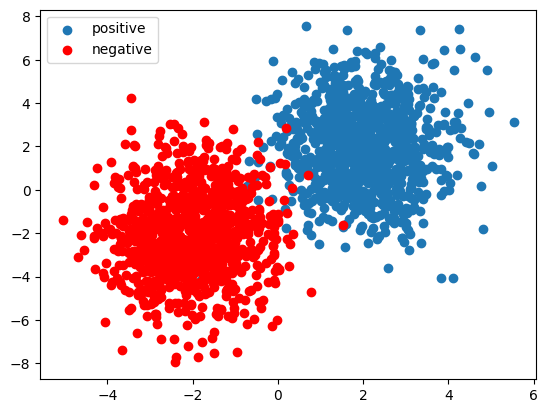

In [11]:
plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1], c='r')
plt.legend(['positive', 'negative'])

In [15]:
X = np.concatenate([data1, data2])
y = np.concatenate([label1, label2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We want to find a hyperplan ($dim = dim_{features} - 1$) that linearly separate the data such as $wx-b=0$ and we predict the label as $y=sign(wx-b)$.

We need to minimize the euclidian distance $\|w\|=\sqrt{\sum^D_{j=1}(w^{(j)})^2}$ such that:
- $wx_i-b\geq1$ if $y_i=+1$
- $wx_i-b\leq-1$ if $y_i=-1$

In [67]:
def svm(w, x, b):
    return np.dot(x, w) - b

In [68]:
# Hinge loss
def hinge_loss(y_true, y_pred):
    loss = 0
    for i in range(len(y_true)):
        loss += max(0, 1 - y_true[i] * y_pred[i])
    return loss / len(y_true)

In [69]:
W = np.array([1,1])
x = np.array([[1,2], [1,1], [1,1]])

In [94]:
def grad_w(x, y, w, b):
    n = x.shape[0]
    gradients = np.zeros_like(w)
    
    for i in range(n):
        if y[i] * (np.dot(x[i], w) + b) < 1:
            # For misclassified points
            gradients += -y[i] * x[i]
    return gradients / n

In [95]:
def grad_b(x, y, w, b):
    n = x.shape[0]
    gradients = np.zeros_like(b)
    
    for i in range(n):
        if y[i] * (np.dot(x[i], w) + b) < 1:
            # For misclassified points
            gradients += y[i]
    return gradients / n

In [103]:
iterations = 100
w = np.random.random(dim_features-1)
b = np.random.random(1)
alpha = 0.0001

for i in range(iterations):
    y_pred = svm(w, X_train, b)
    loss = hinge_loss(y_train, y_pred)
    print(f'Iteration {i+1}: loss = {loss:.4f}')
    w = w - alpha * grad_w(X_train, y_train, w, b)
    b = b - alpha * grad_b(X_train, y_train, w, b)

ValueError: shapes (1600,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)

In [102]:
x_graph = np.linspace(np.min(X), np.max(X), 1000)
y_graph = w * x_graph - b

plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1], c='r')
plt.plot(x_graph, y_graph, c='g')
plt.legend(['positive', 'negative'])

ValueError: operands could not be broadcast together with shapes (2,) (1000,) 